# Hypothyroid prediction using Random Forest

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

file_handler = open("F:\\Thyroid Final\\hypothyroid.csv", "r") 
df = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 


In [3]:
df.loc[df['Age'] == '455', 'Age'] = '45'
df = df.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0,'M':0,'F':1})
df = df.replace(to_replace={'?':True})
df.dropna(inplace=True)
df.head(5)

,class,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,0,0,0,0,0,0,0,0,...,1,0.6,1,15,1,1.48,1,10,0,True
1,hypothyroid,15,1,1,0,0,0,0,0,0,...,1,1.7,1,19,1,1.13,1,17,0,True
2,hypothyroid,24,0,0,0,0,0,0,0,0,...,1,0.2,1,4,1,1,1,0,0,True
3,hypothyroid,24,1,0,0,0,0,0,0,0,...,1,0.4,1,6,1,1.04,1,6,0,True
4,hypothyroid,77,0,0,0,0,0,0,0,0,...,1,1.2,1,57,1,1.28,1,44,0,True


In [4]:
df.describe()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["class"] = lb_make.fit_transform(df["class"])


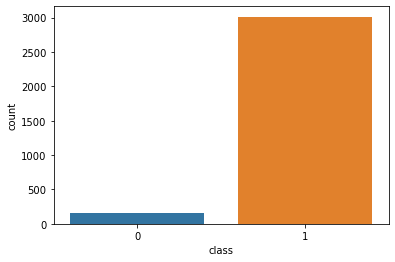

In [6]:
import seaborn as sns
sns.countplot(x="class",data=df)

In [7]:
x=df.iloc[:,[1,2,3,4,6,9,10,11,12,13,14,15,16,17,18,19]]
y=df["class"]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [9]:
from sklearn.ensemble import RandomForestClassifier
a=RandomForestClassifier()
a.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
y_pred=a.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100


98.81516587677726

In [11]:
    from sklearn import metrics

    expected_y  = y_test
    y_pred = a.predict(x_test)
    
    # summarize the fit of the model
    print(); print(metrics.classification_report(expected_y,y_pred))
    print(); print(metrics.confusion_matrix(expected_y, y_pred))
    print("Accuracy:  ",metrics.accuracy_score(expected_y, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.84      0.86        55
           1       0.99      1.00      0.99      1211

    accuracy                           0.99      1266
   macro avg       0.94      0.92      0.93      1266
weighted avg       0.99      0.99      0.99      1266


[[  46    9]
 [   6 1205]]
Accuracy:   0.9881516587677726


In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  46,    9],
       [   6, 1205]], dtype=int64)

In [13]:
# calculate accuracy
from sklearn import metrics
print("ACCURACY:")
print(metrics.accuracy_score(y_test, y_pred))


ACCURACY:
0.9881516587677726


In [14]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
print("Percentage of ones")
y_test.mean()


Percentage of ones


0.9565560821484992

In [15]:
print("Percentage of zeros")
1 - y_test.mean()


Percentage of zeros


0.04344391785150081

In [16]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())


0.9565560821484992

In [17]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


[[  46    9]
 [   6 1205]]


In [18]:
print("classification_error")
print(1 - metrics.accuracy_score(y_test, y_pred))


classification_error
0.011848341232227444


In [19]:
print("sensitivity")
print(metrics.recall_score(y_test, y_pred))


sensitivity
0.9950454170107349


In [20]:
print("True Positive Rate")
specificity = TN / (TN + FP)

print(specificity)


True Positive Rate
0.8363636363636363


In [21]:
false_positive_rate = FP / float(TN + FP)
print("false_positive_rate")
print(false_positive_rate)

false_positive_rate
0.16363636363636364


In [22]:
print("precision")
print(metrics.precision_score(y_test, y_pred))

precision
0.9925864909390445


In [23]:
print(metrics.roc_auc_score(y_test, y_pred))

0.9157045266871858


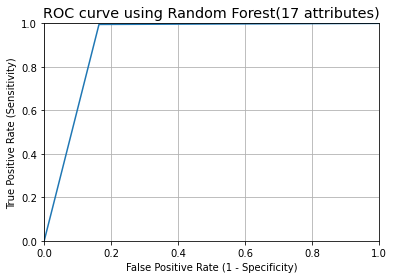

In [24]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve using Random Forest(17 attributes)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


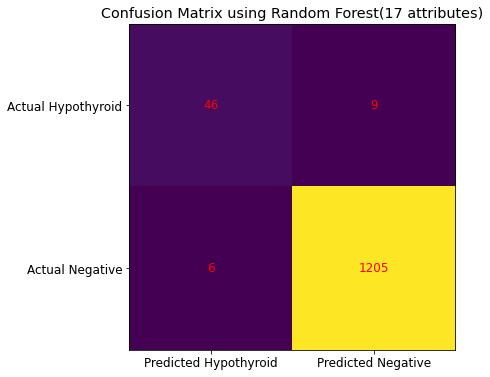

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, a.predict(x_test))
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Hypothyroid', 'Predicted Negative'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Hypothyroid', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.title("Confusion Matrix using Random Forest(17 attributes)")
plt.show()


In [26]:
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.994


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(a, x_train, y_train, cv=kfold, scoring='accuracy')
cv_results


array([0.97894737, 0.98947368, 0.96315789, 0.97894737, 0.97368421,
       0.98421053, 0.97894737, 0.98412698, 0.98941799, 0.97354497])